# Generation of lagged and stepped Dataframe for 1-month ahead forecasting
These functions serve to construct the dataset suitable for forecasting

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Create lagged dataset
def create_lagged_dataset(dataset, lag_dict, target_var):
    lagged_dataset = dataset.copy()
    columns_list = list(lagged_dataset.columns)
    data_join = {}
    for column in columns_list:
        if column == 'date':
            continue
        col_lag = lag_dict[column]
        if column == target_var:
            data_join[column] = lagged_dataset[column]
        for n in range(1,col_lag+1):
            data_join[F'{column}_L{n}'] = lagged_dataset[column].shift(n)
    lagged_dataset = pd.concat(data_join.values(), axis=1, ignore_index = True)
    lagged_dataset.columns = data_join.keys()
    return lagged_dataset.dropna() # dropping of NaN values so that regression can be easily done

# Generate Stepped Dataset for Training
## Steps is the number of weeks ahead that we are forecasting, e.g. step=2 is 2 weeks ahead.
## Note step=1 results in no change to dataset, i.e. use generated lagged variables to forecast current. 
def create_stepped_dataset(dataset, step, target_var):
    shifted_dataset = dataset.copy()
    y = shifted_dataset[[target_var]].shift(-step+1)
    if step != 1:
        X = shifted_dataset.iloc[:-step+1, :] # remove the last few rows
    else:
        X = shifted_dataset
    return X.drop(target_var, axis = 1), y.dropna()
## So now target variable (y variable for exploration) is shifted back by 2 weeks. i.e., taking the y-value from 2 weeks later
## and setting it to the current index. So linear regression of y+2 with the current X values. X will have
## a smaller dataset with the last 2 time points removed because of the shift. 

def generate_next_date(list_of_dates, date):
    return list_of_dates[list_of_dates > date].min()

def process_factor_model(X_factor, y_factor, train_end, window_length = 120):
    X_train = X_factor.iloc[train_end-window_length:train_end]
    X_test = X_factor.iloc[train_end:train_end+1]

    y_train = y_factor.loc[X_train.index]
    y_test = y_factor.loc[X_test.index]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

Optimal Lags for US and UK economy as per PACF / AIC method

In [10]:
us_optimal_lags = dict({
    'infl_rate_diff':14,
    'cons_conf':9,
    'gdp_pct_change':14,
    'int_3m':5,
    'ppi_diff':14,
    'unm_rate':1
})

uk_optimal_lags = dict({
    'infl_rate_diff':11,
    'cons_conf':1,
    'gdp_pct_change':16,
    'int_3m':1,
    'ppi_diff':12,
    'unm_rate':4
})

Optimal parameters for LSTM model

In [11]:
lstm_hyperparams_dict_healthcare_us_monthly = dict(
    {1: dict({
        'units':[96,32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.1,0.1,0.1,0.1],
        'activation':['linear','linear','tanh','linear'],
        'lr':0.00209452781254191
    }),
     2: dict({
        'units':[96,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.2,0.1,0.2],
        'activation':['linear','linear','tanh'],
        'lr':0.004107775862916715
    }),
     3: dict({
        'units':[96,32,32],
        'optimizer':'Adam',
        'drop_out':[0.2,0.2,0.2],
        'activation':['tanh','tanh','linear'],
        'lr':0.0035406840889284476
    }),
     4: dict({
        'units':[32,32,32],
        'optimizer':'Adam',
        'drop_out':[0.2,0.1,0.2],
        'activation':['tanh','linear','linear'],
        'lr':0.0005842086404315508
    }),
     5: dict({
        'units':[32,32,32],
        'optimizer':'Adam',
        'drop_out':[0.2,0.2,0.1],
        'activation':['sigmoid','tanh','linear'],
        'lr':0.01539768812695964
    }),
     6: dict({
        'units':[64,32,32],
        'optimizer':'Adam',
        'drop_out':[0.2,0.2,0.1],
        'activation':['tanh','linear','linear'],
        'lr':0.001172720778910653
    })}
)

lstm_hyperparams_dict_healthcare_uk_monthly = dict(
    {1: dict({
        'units':[32,32],
        'optimizer':'Adam',
        'drop_out':[0.1,0.1],
        'activation':['linear','tanh'],
        'lr':0.04692773350706299
    }),
     2: dict({
        'units':[32,32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.2,0.2,0.1,0.1],
        'activation':['linear','linear','tanh','tanh'],
        'lr':0.0027559297251538695
    }),
     3: dict({
        'units':[128,32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.1,0.2,0.2,0.1],
        'activation':['tanh','linear','tanh','tanh'],
        'lr':0.0033904359243909243
    }),
     4: dict({
        'units':[96,32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.2,0.2,0.2,0.1],
        'activation':['tanh','linear','tanh','tanh'],
        'lr':0.0058921140024817105
    }),
     5: dict({
        'units':[64,32,32],
        'optimizer':'Adagrad',
        'drop_out':[0.2,0.1,0.1],
        'activation':['tanh','sigmoid','linear'],
        'lr':0.001379526955364811
    }),
     6: dict({
        'units':[96,32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.1,0.2,0.2,0.2],
        'activation':['tanh','linear','tanh','tanh'],
        'lr':0.00023168509056616956
    }),
    7: dict({
        'units':[64,32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.2,0.2,0.1,0.1],
        'activation':['tanh','tanh','linear','linear'],
        'lr':0.0010137983528640687
    }),
    8: dict({
        'units':[32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.2,0.1,0.2],
        'activation':['tanh','tanh','tanh'],
        'lr':0.04818160436963496
    }),
    9: dict({
        'units':[128,32],
        'optimizer':'Adam',
        'drop_out':[0.1,0.1],
        'activation':['tanh','linear'],
        'lr':0.004347669530569911
    }),
    10: dict({
        'units':[128,32],
        'optimizer':'Adam',
        'drop_out':[0.2,0.2],
        'activation':['tanh','tanh'],
        'lr':0.0003758643392217273
    }),
    11: dict({
        'units':[128,32,32,32],
        'optimizer':'Adam',
        'drop_out':[0.1,0.2,0.2,0.1],
        'activation':['tanh','tanh','linear','linear'],
        'lr':0.0005964355656236208
    }),
    12: dict({
        'units':[96,32],
        'optimizer':'Nadam',
        'drop_out':[0.1,0.2],
        'activation':['tanh','linear'],
        'lr':0.0038874392172875733
    }),
    13: dict({
        'units':[64,32,32],
        'optimizer':'Adam',
        'drop_out':[0.1,0.1,0.1],
        'activation':['linear','linear','tanh'],
        'lr':0.0003414596058972786
    }),
    14: dict({
        'units':[128,32,32],
        'optimizer':'Adam',
        'drop_out':[0.2,0.1,0.2],
        'activation':['tanh','tanh','linear'],
        'lr':0.0009549466557181202
    })}
)

lstm_hyperparams_dict_healthcare_us_quarterly = dict(
    {1: dict({
        'units':[32,32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.1,0.2,0.1,0.2],
        'activation':['tanh','tanh','tanh','tanh'],
        'lr':0.0004277227509026501
    }),
     2: dict({
        'units':[32,32,32],
        'optimizer':'Adagrad',
        'drop_out':[0.2,0.1,0.2],
        'activation':['tanh','linear','linear'],
        'lr':0.0016339385388774038
    }),
     3: dict({
        'units':[96,32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.1,0.2,0.1,0.1],
        'activation':['linear','tanh','tanh','tanh'],
        'lr':0.007599082376541289
    }),
     4: dict({
        'units':[64,32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.2,0.1,0.1,0.2],
        'activation':['tanh','linear','tanh','linear'],
        'lr':0.0013408442327624412
    })}
)

lstm_hyperparams_dict_healthcare_uk_quarterly = dict(
    {1: dict({
        'units':[32,32,32,32],
        'optimizer':'Adam',
        'drop_out':[0.1,0.2,0.2,0.1],
        'activation':['sigmoid','tanh','tanh','tanh'],
        'lr':0.0014647752917040927
    }),
     2: dict({
        'units':[64,32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.2,0.1,0.2,0.2],
        'activation':['tanh','linear','linear','tanh'],
        'lr':0.0027559297251538695
    }),
     3: dict({
        'units':[96,32,32,32],
        'optimizer':'Adagrad',
        'drop_out':[0.2,0.2,0.1,0.1],
        'activation':['sigmoid','tanh','tanh','tanh'],
        'lr':0.010813378402855827
    }),
     4: dict({
        'units':[64,32],
        'optimizer':'Nadam',
        'drop_out':[0.1,0.2],
        'activation':['linear','tanh'],
        'lr':0.00971247132967637
    }),
     5: dict({
        'units':[64,32,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.2,0.1,0.1,0.1],
        'activation':['tanh','sigmoid','tanh','tanh'],
        'lr':0.0012528157640500648
    }),
     6: dict({
        'units':[128,32,32],
        'optimizer':'Adagrad',
        'drop_out':[0.2,0.1,0.2],
        'activation':['sigmoid','tanh','tanh'],
        'lr':0.03537071368688055
    }),
    7: dict({
        'units':[64,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.2,0.1,0.1],
        'activation':['sigmoid','linear','tanh'],
        'lr':0.0006879878591752019
    }),
    8: dict({
        'units':[64,32],
        'optimizer':'Adagrad',
        'drop_out':[0.2,0.2],
        'activation':['sigmoid','sigmoid'],
        'lr':0.022239434498843517
    }),
    9: dict({
        'units':[96,32,32],
        'optimizer':'Nadam',
        'drop_out':[0.1,0.2,0.1],
        'activation':['tanh','tanh','tanh'],
        'lr':0.00029671375213130146
    }),
    10: dict({
        'units':[96,32],
        'optimizer':'Nadam',
        'drop_out':[0.2,0.2],
        'activation':['linear','tanh'],
        'lr':0.0008546915367504593
    }),
    11: dict({
        'units':[32,32,32],
        'optimizer':'Adam',
        'drop_out':[0.1,0.2,0.1],
        'activation':['tanh','linear','tanh'],
        'lr':0.00024260726468585856
    }),
    12: dict({
        'units':[96,32,32],
        'optimizer':'Adagrad',
        'drop_out':[0.2,0.2,0.1],
        'activation':['linear','sigmoid','tanh'],
        'lr':0.02510676487272628
    })}
)

# Model function for non-traditional models

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, SGDRegressor
import numpy as np
import math
import keras_tuner as kt
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, Nadam
from sklearn.decomposition import PCA
import gc

def overall_function(dataset_link, outcome_var, lag_dict, horizon_num, window_length, lstm_hyperparam_dict, country = "US", period = "monthly"):
    dataset = pd.read_csv(dataset_link)
    dataset['ppi_diff'] = dataset['ppi'].diff()
    dataset['infl_rate_diff'] = dataset['infl_rate'].diff()
    dataset = dataset.dropna(subset=['infl_rate_diff'])
    dataset = dataset.drop(columns=['infl_rate','ppi'])
    dataset['date'] = pd.to_datetime(dataset['date']) # converting to date format
    dataset = dataset.sort_values(by='date')
    dataset = dataset.drop(columns = 'date')
    if period != "monthly":
        dataset['date'] = pd.to_datetime(dataset['date'])
        dataset = dataset[dataset['date'].dt.month.isin([3,6,9,12])]

    # Creating Lagged and Stepped Datasets
    X_dataset, y_dataset = create_stepped_dataset(create_lagged_dataset(dataset, lag_dict = lag_dict, target_var = outcome_var), step=horizon_num, target_var = outcome_var)
    
    # Initialising the training end
    train_end = window_length
    
    results = []
    
    ## Implement cross-validation split
    tscv = TimeSeriesSplit(n_splits = 5)
    batch_num = 1
    count = 0
    while train_end < len(X_dataset):
        if count == 24:
            batch_num += 1
            count = 0 # Restart count
        # Process data for modeling
        X_train, X_test, y_train, y_test = process_factor_model(X_dataset, y_dataset, train_end, window_length=window_length)
        
        # For Adding Results
        df_in_loop = y_test.copy()
        
        ### Model 1: Ridge Regression ###
        ridge_cv = RidgeCV(cv = tscv)
        ridge_cv.fit(X_train, y_train)
    
        ridge_model = Ridge(alpha = ridge_cv.alpha_)
        ridge_model.fit(X_train, y_train)
        
        ridgepred = ridge_model.predict(X_test)
        # Adding Linear Model
        df_in_loop[f'ridge'] = ridgepred
        print('Ridge Done')
        
        ### Model 2: PCA ###
        X_train = pd.DataFrame(X_train)
        X_test = pd.DataFrame(X_test)

        X_train_pure = X_train
        X_test_pure = X_test
        
        pca = PCA()
        pca.fit(X_train_pure)
        cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
          #to explain more than 85% of the variance
        num_components = np.where(cumulative_variance_ratio >= 0.85)[0][0] + 1 
        pca_new = PCA(n_components=num_components)
        X_train_pca = pca_new.fit_transform(X_train_pure)
        X_train_pca = pd.DataFrame(X_train_pca)
        X_train_pca.columns = X_train_pca.columns.astype(str)

        X_test_pca = pca_new.transform(X_test_pure)
        X_test_pca = pd.DataFrame(X_test_pca)
        X_test_pca.columns = X_test_pca.columns.astype(str)
        
        pure_factor_model = LinearRegression()
        pure_factor_model.fit(X_train_pca, y_train)
        y_pred = pure_factor_model.predict(X_test_pca)
        df_in_loop[f'pca'] = y_pred
        print('PCA Done')
        
        # **Free Memory Before LSTM**
        tf.keras.backend.clear_session()
        gc.collect()
        
        ## Model 3: LSTM ###
        X_train_lstm = np.array(X_train).astype(np.float32)
        X_test_lstm = np.array(X_test).astype(np.float32)
        y_train_lstm = np.array(y_train).astype(np.float32)
        
        num_layers = len(lstm_hyperparam_dict[batch_num]['units'])
        print(f'Using LSTM Hyperparameters from batch {batch_num} which has {num_layers} layers!')
        
        # Building LSTM Model
        lstm_model = Sequential()
        for layer_num in range(num_layers):
            is_last_layer =(layer_num == (num_layers - 1))  # Check if it's the last layer
            lstm_model.add(LSTM(
                units=lstm_hyperparam_dict[batch_num]['units'][layer_num], 
                return_sequences=not is_last_layer,  # Only last layer has return_sequences=False
                input_shape=(X_train_lstm.shape[1], 1) if layer_num == 0 else None,  # Define input shape only for the first layer
                activation=lstm_hyperparam_dict[batch_num]['activation'][layer_num]
            ))
            lstm_model.add(Dropout(lstm_hyperparam_dict[batch_num]['drop_out'][layer_num]))
        # Output Layer
        lstm_model.add(Dense(units=1))
        
        # Compilation
        if lstm_hyperparam_dict[batch_num]['optimizer'] == 'Adam':
            lstm_model.compile(
                optimizer=Adam(learning_rate=lstm_hyperparam_dict[batch_num]['lr']),
                loss='mean_squared_error',
                metrics=[
                    tf.keras.metrics.RootMeanSquaredError()
                ]
            )
        elif lstm_hyperparam_dict[batch_num]['optimizer'] == 'Nadam':
            lstm_model.compile(
                optimizer=Nadam(learning_rate=lstm_hyperparam_dict[batch_num]['lr']),
                loss='mean_squared_error',
                metrics=[
                    tf.keras.metrics.RootMeanSquaredError()
                ]
            )
        else:
            lstm_model.compile(
                optimizer=Adagrad(learning_rate=lstm_hyperparam_dict[batch_num]['lr']),
                loss='mean_squared_error',
                metrics=[
                    tf.keras.metrics.RootMeanSquaredError()
                ]
            )

        # Early stopping callback
        callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

        # Train the model
        lstm_model.fit(
            X_train_lstm, y_train_lstm,
            epochs=10, batch_size=16,
            callbacks=[callback], verbose=0
        )

        lstmpred = lstm_model.predict(X_test_lstm)
        df_in_loop['lstm'] = lstmpred.reshape(-1)  # Ensure correct shape
        print('LSTM Done')
        
        # Add results into loop
        results.append(df_in_loop)
        train_end += 1
        count += 1
        num_remaining_dates = len(X_dataset) - train_end
        print(f'{num_remaining_dates} dates remaining')
        
    # return(results)
    combined_df = pd.concat(results, ignore_index=True)
    return combined_df

Monthly analysis

In [15]:
us_results = overall_function("../data/US_consolidated_df.csv", 
                     outcome_var = "infl_rate_diff", 
                     lag_dict= us_optimal_lags, 
                     horizon_num = 1, window_length=120, 
                     lstm_hyperparam_dict=lstm_hyperparams_dict_healthcare_us_monthly)
us_results.to_csv("us_results_monthly_aic.csv")

uk_results = overall_function("../data/UK_consolidated_df.csv", 
                     outcome_var = "infl_rate_diff", 
                     lag_dict= uk_optimal_lags, 
                     horizon_num = 1, window_length=120,
                     lstm_hyperparam_dict=lstm_hyperparams_dict_healthcare_uk_monthly, country = "UK")
uk_results.to_csv("uk_results_monthly_aic.csv")

Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
LSTM Done
126 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
LSTM Done
125 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
LSTM Done
124 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
LSTM Done
123 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
LSTM Done
122 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
LSTM Done
121 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
LSTM Done
120 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
LSTM Done
119 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
LSTM Done
118 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step
LSTM Done
117 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
LSTM Done
116 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
LSTM Done
115 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
LSTM Done
114 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
LSTM Done
113 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
LSTM Done
112 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
LSTM Done
111 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
LSTM Done
110 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
LSTM Done
109 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
LSTM Done
108 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
LSTM Done
107 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
LSTM Done
106 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
LSTM Done
105 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
LSTM Done
104 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
LSTM Done
103 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
LSTM Done
102 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
LSTM Done
101 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
LSTM Done
100 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
LSTM Done
99 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
LSTM Done
98 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
LSTM Done
97 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
LSTM Done
96 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
LSTM Done
95 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
LSTM Done
94 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
LSTM Done
93 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
LSTM Done
92 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
LSTM Done
91 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
LSTM Done
90 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
LSTM Done
89 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
LSTM Done
88 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
LSTM Done
87 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
LSTM Done
86 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step
LSTM Done
85 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
LSTM Done
84 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
LSTM Done
83 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
LSTM Done
82 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
LSTM Done
81 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
LSTM Done
80 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
LSTM Done
79 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
LSTM Done
78 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
LSTM Done
77 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
LSTM Done
76 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
LSTM Done
75 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
LSTM Done
74 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
LSTM Done
73 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
LSTM Done
72 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
LSTM Done
71 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
LSTM Done
70 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
LSTM Done
69 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
LSTM Done
68 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
LSTM Done
67 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
LSTM Done
66 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
LSTM Done
65 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
LSTM Done
64 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
LSTM Done
63 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
LSTM Done
62 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
LSTM Done
61 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
LSTM Done
60 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
LSTM Done
59 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
LSTM Done
58 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
LSTM Done
57 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
LSTM Done
56 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
LSTM Done
55 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
LSTM Done
54 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
LSTM Done
53 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
LSTM Done
52 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
LSTM Done
51 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
LSTM Done
50 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
LSTM Done
49 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
LSTM Done
48 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
LSTM Done
47 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
LSTM Done
46 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
LSTM Done
45 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
LSTM Done
44 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
LSTM Done
43 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
LSTM Done
42 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
LSTM Done
41 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
LSTM Done
40 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
LSTM Done
39 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step
LSTM Done
38 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
LSTM Done
37 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
LSTM Done
36 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
LSTM Done
35 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
LSTM Done
34 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
LSTM Done
33 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
LSTM Done
32 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
LSTM Done
31 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
LSTM Done
30 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
LSTM Done
29 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
LSTM Done
28 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
LSTM Done
27 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
LSTM Done
26 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
LSTM Done
25 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
LSTM Done
24 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
LSTM Done
23 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
LSTM Done
22 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
LSTM Done
21 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
LSTM Done
20 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
LSTM Done
19 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
LSTM Done
18 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
LSTM Done
17 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
LSTM Done
16 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
LSTM Done
15 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
LSTM Done
14 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
LSTM Done
13 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
LSTM Done
12 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
LSTM Done
11 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
LSTM Done
10 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
LSTM Done
9 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
LSTM Done
8 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
LSTM Done
7 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
LSTM Done
6 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
LSTM Done
5 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
LSTM Done
4 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
LSTM Done
3 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
LSTM Done
2 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step
LSTM Done
1 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
LSTM Done
0 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
LSTM Done
329 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
LSTM Done
328 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
LSTM Done
327 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
LSTM Done
326 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
LSTM Done
325 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
LSTM Done
324 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
LSTM Done
323 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
LSTM Done
322 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
LSTM Done
321 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
LSTM Done
320 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
LSTM Done
319 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
LSTM Done
318 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
LSTM Done
317 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
LSTM Done
316 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
LSTM Done
315 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
LSTM Done
314 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
LSTM Done
313 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
LSTM Done
312 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
LSTM Done
311 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
LSTM Done
310 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
LSTM Done
309 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
LSTM Done
308 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
LSTM Done
307 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
LSTM Done
306 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
LSTM Done
305 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step
LSTM Done
304 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
LSTM Done
303 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step
LSTM Done
302 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
LSTM Done
301 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
LSTM Done
300 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
LSTM Done
299 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
LSTM Done
298 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
LSTM Done
297 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
LSTM Done
296 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
LSTM Done
295 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
LSTM Done
294 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
LSTM Done
293 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
LSTM Done
292 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
LSTM Done
291 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
LSTM Done
290 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
LSTM Done
289 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
LSTM Done
288 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
LSTM Done
287 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
LSTM Done
286 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
LSTM Done
285 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
LSTM Done
284 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
LSTM Done
283 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
LSTM Done
282 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
LSTM Done
281 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
LSTM Done
280 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
LSTM Done
279 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
LSTM Done
278 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
LSTM Done
277 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
LSTM Done
276 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
LSTM Done
275 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
LSTM Done
274 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
LSTM Done
273 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
LSTM Done
272 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
LSTM Done
271 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
LSTM Done
270 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
LSTM Done
269 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
LSTM Done
268 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
LSTM Done
267 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
LSTM Done
266 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
LSTM Done
265 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
LSTM Done
264 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
LSTM Done
263 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
LSTM Done
262 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
LSTM Done
261 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
LSTM Done
260 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
LSTM Done
259 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
LSTM Done
258 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
LSTM Done
257 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
LSTM Done
256 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
LSTM Done
255 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
LSTM Done
254 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
LSTM Done
253 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
LSTM Done
252 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
LSTM Done
251 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
LSTM Done
250 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
LSTM Done
249 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
LSTM Done
248 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
LSTM Done
247 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
LSTM Done
246 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step
LSTM Done
245 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
LSTM Done
244 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
LSTM Done
243 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
LSTM Done
242 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
LSTM Done
241 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
LSTM Done
240 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
LSTM Done
239 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
LSTM Done
238 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
LSTM Done
237 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
LSTM Done
236 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
LSTM Done
235 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
LSTM Done
234 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
LSTM Done
233 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step
LSTM Done
232 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
LSTM Done
231 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
LSTM Done
230 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
LSTM Done
229 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
LSTM Done
228 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
LSTM Done
227 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
LSTM Done
226 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
LSTM Done
225 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
LSTM Done
224 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
LSTM Done
223 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
LSTM Done
222 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
LSTM Done
221 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
LSTM Done
220 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
LSTM Done
219 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
LSTM Done
218 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
LSTM Done
217 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
LSTM Done
216 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
LSTM Done
215 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
LSTM Done
214 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
LSTM Done
213 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
LSTM Done
212 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
LSTM Done
211 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
LSTM Done
210 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
LSTM Done
209 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
LSTM Done
208 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
LSTM Done
207 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
LSTM Done
206 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
LSTM Done
205 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
LSTM Done
204 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
LSTM Done
203 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
LSTM Done
202 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
LSTM Done
201 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
LSTM Done
200 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
LSTM Done
199 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
LSTM Done
198 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
LSTM Done
197 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
LSTM Done
196 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
LSTM Done
195 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
LSTM Done
194 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
LSTM Done
193 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
LSTM Done
192 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
LSTM Done
191 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
LSTM Done
190 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
LSTM Done
189 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
LSTM Done
188 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
LSTM Done
187 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
LSTM Done
186 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
LSTM Done
185 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
LSTM Done
184 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
LSTM Done
183 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
LSTM Done
182 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
LSTM Done
181 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
LSTM Done
180 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
LSTM Done
179 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step
LSTM Done
178 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
LSTM Done
177 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
LSTM Done
176 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
LSTM Done
175 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
LSTM Done
174 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step
LSTM Done
173 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
LSTM Done
172 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
LSTM Done
171 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step
LSTM Done
170 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
LSTM Done
169 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
LSTM Done
168 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
LSTM Done
167 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
LSTM Done
166 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
LSTM Done
165 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step
LSTM Done
164 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
LSTM Done
163 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
LSTM Done
162 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
LSTM Done
161 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
LSTM Done
160 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
LSTM Done
159 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
LSTM Done
158 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
LSTM Done
157 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
LSTM Done
156 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
LSTM Done
155 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
LSTM Done
154 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
LSTM Done
153 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
LSTM Done
152 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
LSTM Done
151 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
LSTM Done
150 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
LSTM Done
149 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
LSTM Done
148 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
LSTM Done
147 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
LSTM Done
146 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
LSTM Done
145 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
LSTM Done
144 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
LSTM Done
143 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
LSTM Done
142 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
LSTM Done
141 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
LSTM Done
140 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
LSTM Done
139 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
LSTM Done
138 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
LSTM Done
137 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
LSTM Done
136 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
LSTM Done
135 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
LSTM Done
134 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
LSTM Done
133 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
LSTM Done
132 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
LSTM Done
131 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
LSTM Done
130 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
LSTM Done
129 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
LSTM Done
128 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
LSTM Done
127 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
LSTM Done
126 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
LSTM Done
125 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
LSTM Done
124 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
LSTM Done
123 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
LSTM Done
122 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
LSTM Done
121 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
LSTM Done
120 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
LSTM Done
119 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
LSTM Done
118 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
LSTM Done
117 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
LSTM Done
116 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
LSTM Done
115 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
LSTM Done
114 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
LSTM Done
113 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
LSTM Done
112 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
LSTM Done
111 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
LSTM Done
110 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
LSTM Done
109 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
LSTM Done
108 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
LSTM Done
107 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
LSTM Done
106 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
LSTM Done
105 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
LSTM Done
104 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
LSTM Done
103 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
LSTM Done
102 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
LSTM Done
101 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
LSTM Done
100 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
LSTM Done
99 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
LSTM Done
98 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
LSTM Done
97 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
LSTM Done
96 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
LSTM Done
95 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
LSTM Done
94 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
LSTM Done
93 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
LSTM Done
92 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
LSTM Done
91 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
LSTM Done
90 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
LSTM Done
89 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step
LSTM Done
88 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
LSTM Done
87 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
LSTM Done
86 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
LSTM Done
85 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
LSTM Done
84 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
LSTM Done
83 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step
LSTM Done
82 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
LSTM Done
81 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
LSTM Done
80 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
LSTM Done
79 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step
LSTM Done
78 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
LSTM Done
77 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
LSTM Done
76 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
LSTM Done
75 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
LSTM Done
74 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
LSTM Done
73 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
LSTM Done
72 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
LSTM Done
71 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
LSTM Done
70 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
LSTM Done
69 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
LSTM Done
68 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step
LSTM Done
67 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step
LSTM Done
66 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
LSTM Done
65 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
LSTM Done
64 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
LSTM Done
63 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
LSTM Done
62 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
LSTM Done
61 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
LSTM Done
60 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
LSTM Done
59 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
LSTM Done
58 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
LSTM Done
57 dates remaining
Ridge Done
PCA Done


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Using LSTM Hyperparameters from batch 12 which has 2 layers!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
LSTM Done
56 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
LSTM Done
55 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
LSTM Done
54 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
LSTM Done
53 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
LSTM Done
52 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
LSTM Done
51 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
LSTM Done
50 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
LSTM Done
49 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
LSTM Done
48 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
LSTM Done
47 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
LSTM Done
46 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
LSTM Done
45 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
LSTM Done
44 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
LSTM Done
43 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
LSTM Done
42 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
LSTM Done
41 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
LSTM Done
40 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
LSTM Done
39 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
LSTM Done
38 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
LSTM Done
37 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
LSTM Done
36 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
LSTM Done
35 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step
LSTM Done
34 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
LSTM Done
33 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
LSTM Done
32 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
LSTM Done
31 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
LSTM Done
30 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
LSTM Done
29 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
LSTM Done
28 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
LSTM Done
27 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
LSTM Done
26 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
LSTM Done
25 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
LSTM Done
24 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
LSTM Done
23 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
LSTM Done
22 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
LSTM Done
21 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
LSTM Done
20 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
LSTM Done
19 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 13 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
LSTM Done
18 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
LSTM Done
17 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
LSTM Done
16 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
LSTM Done
15 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
LSTM Done
14 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
LSTM Done
13 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
LSTM Done
12 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
LSTM Done
11 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
LSTM Done
10 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
LSTM Done
9 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
LSTM Done
8 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
LSTM Done
7 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
LSTM Done
6 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
LSTM Done
5 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
LSTM Done
4 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
LSTM Done
3 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
LSTM Done
2 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
LSTM Done
1 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 14 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
LSTM Done
0 dates remaining


Quarterly analysis

In [ ]:
us_results_quarterly = overall_function("../data/US_consolidated_df.csv", 
                     outcome_var = "infl_rate_diff", 
                     lag_dict= us_optimal_lags, 
                     horizon_num = 1, window_length=40, 
                     lstm_hyperparam_dict=lstm_hyperparams_dict_healthcare_us_quarterly,
                     period = "quarterly", max_batch_size=4)
us_results_quarterly.to_csv("us_ml_results_quarterly.csv")

uk_results_quarterly = overall_function("../data/UK_consolidated_df.csv", 
                     outcome_var = "infl_rate_diff", 
                     lag_dict= uk_optimal_lags, 
                     horizon_num = 1, window_length=40, 
                     lstm_hyperparam_dict=lstm_hyperparams_dict_healthcare_uk_quarterly,
                     period = "quarterly", max_batch_size=12)
uk_results_quarterly.to_csv("uk_ml_results_quarterly.csv")

Ridge Done
PCA Done

Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step
LSTM Done
32 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
LSTM Done
31 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
LSTM Done
30 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
LSTM Done
29 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
LSTM Done
28 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
LSTM Done
27 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
LSTM Done
26 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
LSTM Done
25 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
LSTM Done
24 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
LSTM Done
23 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
LSTM Done
22 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
LSTM Done
21 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
LSTM Done
20 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
LSTM Done
19 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
LSTM Done
18 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
LSTM Done
17 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
LSTM Done
16 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
LSTM Done
15 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
LSTM Done
14 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
LSTM Done
13 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
LSTM Done
12 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
LSTM Done
11 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
LSTM Done
10 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
LSTM Done
9 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
LSTM Done
8 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
LSTM Done
7 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
LSTM Done
6 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
LSTM Done
5 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
LSTM Done
4 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
LSTM Done
3 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
LSTM Done
2 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
LSTM Done
1 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
LSTM Done
0 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
LSTM Done
103 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
LSTM Done
102 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step
LSTM Done
101 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
LSTM Done
100 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
LSTM Done
99 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
LSTM Done
98 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
LSTM Done
97 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 1 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
LSTM Done
96 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
LSTM Done
95 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
LSTM Done
94 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
LSTM Done
93 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
LSTM Done
92 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
LSTM Done
91 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
LSTM Done
90 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
LSTM Done
89 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 2 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
LSTM Done
88 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
LSTM Done
87 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
LSTM Done
86 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
LSTM Done
85 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
LSTM Done
84 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
LSTM Done
83 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
LSTM Done
82 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
LSTM Done
81 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 3 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
LSTM Done
80 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
LSTM Done
79 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
LSTM Done
78 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
LSTM Done
77 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
LSTM Done
76 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
LSTM Done
75 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
LSTM Done
74 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
LSTM Done
73 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 4 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
LSTM Done
72 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
LSTM Done
71 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
LSTM Done
70 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
LSTM Done
69 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
LSTM Done
68 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
LSTM Done
67 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
LSTM Done
66 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
LSTM Done
65 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 5 which has 4 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
LSTM Done
64 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
LSTM Done
63 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
LSTM Done
62 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
LSTM Done
61 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
LSTM Done
60 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
LSTM Done
59 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
LSTM Done
58 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
LSTM Done
57 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 6 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
LSTM Done
56 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
LSTM Done
55 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
LSTM Done
54 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
LSTM Done
53 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
LSTM Done
52 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
LSTM Done
51 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
LSTM Done
50 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
LSTM Done
49 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 7 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
LSTM Done
48 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
LSTM Done
47 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
LSTM Done
46 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
LSTM Done
45 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
LSTM Done
44 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
LSTM Done
43 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
LSTM Done
42 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
LSTM Done
41 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 8 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
LSTM Done
40 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
LSTM Done
39 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
LSTM Done
38 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
LSTM Done
37 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
LSTM Done
36 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
LSTM Done
35 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
LSTM Done
34 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
LSTM Done
33 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 9 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
LSTM Done
32 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
LSTM Done
31 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
LSTM Done
30 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
LSTM Done
29 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
LSTM Done
28 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
LSTM Done
27 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
LSTM Done
26 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
LSTM Done
25 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 10 which has 2 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
LSTM Done
24 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
LSTM Done
23 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
LSTM Done
22 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
LSTM Done
21 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
LSTM Done
20 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
LSTM Done
19 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
LSTM Done
18 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
LSTM Done
17 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 11 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
LSTM Done
16 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
LSTM Done
15 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
LSTM Done
14 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
LSTM Done
13 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
LSTM Done
12 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
LSTM Done
11 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
LSTM Done
10 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
LSTM Done
9 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
LSTM Done
8 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
LSTM Done
7 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
LSTM Done
6 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
LSTM Done
5 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
LSTM Done
4 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
LSTM Done
3 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
LSTM Done
2 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
LSTM Done
1 dates remaining
Ridge Done
PCA Done
Using LSTM Hyperparameters from batch 12 which has 3 layers!


C:\Users\wjlwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
LSTM Done
0 dates remaining


# Monthly Hyperparameter Tuning

Hyperparameter Tuning for LSTM

In [5]:
from tensorflow.keras.optimizers import Adam, Adagrad, Nadam
def build_lstm_model(hp):
    lstm_model = Sequential()
    # Select the number of LSTM layers (2, 3, or 4)
    num_layers = hp.Choice('num_layers', [2, 3, 4])
    # Choose optimizer
    optimizer_name = hp.Choice('optimizer', ['Adam', 'Adagrad', 'Nadam'])
    optimizers = {
        "Adam": Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-1, sampling='LOG')),
        "Adagrad": Adagrad(learning_rate=hp.Float('learning_rate', 1e-4, 1e-1, sampling='LOG')),
        "Nadam": Nadam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-1, sampling='LOG'))
    }
    # Layer 1
    first_layer_units = hp.Int('lstm_units_1', min_value=32, max_value=128, step=32)
    lstm_model.add(LSTM(
        units=first_layer_units,
        return_sequences=True,
        input_shape=(X_train_lstm.shape[1], 1),
        activation=hp.Choice(f'activation_1', ['tanh', 'sigmoid', 'linear'])
    ))
    lstm_model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.3, step=0.1)))
    
    # Add remaining layers with non-increasing units
    previous_units = first_layer_units  # Track previous layer units
    
    for i in range(1, num_layers):
        available_units = [u for u in [32, 64, 96, 128] if u <= previous_units]  # Only allow non-increasing sizes
        current_units = hp.Choice(f'lstm_units_{i+1}', available_units)

        lstm_model.add(LSTM(
            units=current_units,
            return_sequences=True if i < num_layers - 1 else False,  
            activation=hp.Choice(f'activation_{i+1}', ['tanh', 'sigmoid', 'linear'])
        ))
        lstm_model.add(Dropout(hp.Float(f'dropout_{i+1}', min_value=0.1, max_value=0.3, step=0.1)))
        previous_units = current_units  # Update tracking variable
    
    # Output Layer
    lstm_model.add(Dense(units=1))
    
    # Compile the model
    lstm_model.compile(
        optimizer=optimizers[optimizer_name],
        loss='mean_squared_error',
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return lstm_model

def tune_lstm(X_train_lstm, y_train_lstm, batch_num, country, save_path="best_lstm_model"):
    tuner = kt.BayesianOptimization(
        build_lstm_model,
        objective='val_loss',
        max_trials=20,
        executions_per_trial=1,
        directory=f'lstm_tuning_batch_{batch_num}_{country}',
        project_name='fund_forecasting'
    )

    # Perform the search with batch_size as a hyperparameter to tune
    tuner.search(
        X_train_lstm, y_train_lstm,
        epochs=10,
        validation_split=0.2,
        batch_size=16,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
    )

    # Get the best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    # Print the best hyperparameters
    print("Best Hyperparameters:", best_hps.values)
    return best_hps

In [17]:
uk_df = pd.read_csv("../data/UK_consolidated_df.csv")
uk_df['ppi_diff'] = uk_df['ppi'].diff()
uk_df['infl_rate_diff'] = uk_df['infl_rate'].diff()
uk_df = uk_df.dropna(subset=['infl_rate_diff'])
uk_df = uk_df.drop(columns=['infl_rate','ppi'])

lagged_df = create_lagged_dataset(uk_df,lag_dict=us_optimal_lags,target_var="infl_rate_diff")
covariates, y = create_stepped_dataset(lagged_df, step = 1, target_var = 'infl_rate_diff')

train_end = 120
# df_end = list_of_dates.max()

hyperparam_lst = []
batch_num = 1

# First batch
test_date = train_end + 1
X_train, X_test, y_train, y_test = process_factor_model(covariates, y, train_end)
X_train_lstm = np.array(X_train).astype(np.float32)
X_test_lstm = np.array(X_test).astype(np.float32)
y_train_lstm = np.array(y_train).astype(np.float32)
best_model_params = tune_lstm(X_train_lstm, y_train_lstm, batch_num = batch_num, country = "UK")
hyperparam_lst.append(best_model_params)

counter = 1
while test_date <= len(covariates):
    test_date = train_end + 1
    if counter != 24: # Still same year: skip and repeat until the year is the next year
        train_end = test_date
        print(f"Counter is {counter}. Repeating until following year is obtained")
        counter += 1
        continue
    else:
        print(f"Counter is {counter}. Conducting Tuning")
        # Process data for modeling
        X_train, X_test, y_train, y_test = process_factor_model(covariates, y, train_end)
        X_train_lstm = np.array(X_train).astype(np.float32)
        X_test_lstm = np.array(X_test).astype(np.float32)
        y_train_lstm = np.array(y_train).astype(np.float32)
        best_model_params = tune_lstm(X_train_lstm, y_train_lstm, batch_num= batch_num+1, country = "UK")
        hyperparam_lst.append(best_model_params)
        train_end = test_date # after tuning, expand the training set
        counter = 1 # Reinitialise.... Every year 1 new hyperparameter is introduced
        batch_num += 1

Reloading Tuner from lstm_tuning_batch_1_UK\fund_forecasting\tuner0.json
Best Hyperparameters: {'num_layers': 2, 'optimizer': 'Adam', 'learning_rate': 0.04692773350706299, 'lstm_units_1': 32, 'activation_1': 'linear', 'dropout_1': 0.1, 'lstm_units_2': 32, 'activation_2': 'tanh', 'dropout_2': 0.1, 'lstm_units_3': 32, 'activation_3': 'tanh', 'dropout_3': 0.1, 'lstm_units_4': 32, 'activation_4': 'linear', 'dropout_4': 0.1}
Counter is 1. Repeating until following year is obtained
Counter is 2. Repeating until following year is obtained
Counter is 3. Repeating until following year is obtained
Counter is 4. Repeating until following year is obtained
Counter is 5. Repeating until following year is obtained
Counter is 6. Repeating until following year is obtained
Counter is 7. Repeating until following year is obtained
Counter is 8. Repeating until following year is obtained
Counter is 9. Repeating until following year is obtained
Counter is 10. Repeating until following year is obtained
Count

# Quarterly Hyperparameter Tuning

In [8]:
from tensorflow.keras.optimizers import Adam, Adagrad, Nadam
def build_lstm_model(hp):
    lstm_model = Sequential()
    # Select the number of LSTM layers (2, 3, or 4)
    num_layers = hp.Choice('num_layers', [2, 3, 4])
    # Choose optimizer
    optimizer_name = hp.Choice('optimizer', ['Adam', 'Adagrad', 'Nadam'])
    optimizers = {
        "Adam": Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-1, sampling='LOG')),
        "Adagrad": Adagrad(learning_rate=hp.Float('learning_rate', 1e-4, 1e-1, sampling='LOG')),
        "Nadam": Nadam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-1, sampling='LOG'))
    }
    # Layer 1
    first_layer_units = hp.Int('lstm_units_1', min_value=32, max_value=128, step=32)
    lstm_model.add(LSTM(
        units=first_layer_units,
        return_sequences=True,
        input_shape=(X_train_lstm.shape[1], 1),
        activation=hp.Choice(f'activation_1', ['tanh', 'sigmoid', 'linear'])
    ))
    lstm_model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.3, step=0.1)))
    
    # Add remaining layers with non-increasing units
    previous_units = first_layer_units  # Track previous layer units
    
    for i in range(1, num_layers):
        available_units = [u for u in [32, 64, 96, 128] if u <= previous_units]  # Only allow non-increasing sizes
        current_units = hp.Choice(f'lstm_units_{i+1}', available_units)

        lstm_model.add(LSTM(
            units=current_units,
            return_sequences=True if i < num_layers - 1 else False,  
            activation=hp.Choice(f'activation_{i+1}', ['tanh', 'sigmoid', 'linear'])
        ))
        lstm_model.add(Dropout(hp.Float(f'dropout_{i+1}', min_value=0.1, max_value=0.3, step=0.1)))
        previous_units = current_units  # Update tracking variable
    
    # Output Layer
    lstm_model.add(Dense(units=1))
    
    # Compile the model
    lstm_model.compile(
        optimizer=optimizers[optimizer_name],
        loss='mean_squared_error',
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return lstm_model

def tune_lstm(X_train_lstm, y_train_lstm, batch_num, country, save_path="best_lstm_model"):
    tuner = kt.BayesianOptimization(
        build_lstm_model,
        objective='val_loss',
        max_trials=20,
        executions_per_trial=1,
        directory=f'lstm_tuning_batch_{batch_num}_{country}_quarterly',
        project_name='fund_forecasting'
    )

    # Perform the search with batch_size as a hyperparameter to tune
    tuner.search(
        X_train_lstm, y_train_lstm,
        epochs=10,
        validation_split=0.2,
        batch_size=16,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
    )

    # Get the best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    # Print the best hyperparameters
    print("Best Hyperparameters:", best_hps.values)
    return best_hps

In [18]:
uk_df = pd.read_csv("../data/UK_consolidated_df.csv")
uk_df['ppi_diff'] = uk_df['ppi'].diff()
uk_df['infl_rate_diff'] = uk_df['infl_rate'].diff()
uk_df = uk_df.dropna(subset=['infl_rate_diff'])
uk_df = uk_df.drop(columns=['infl_rate','ppi'])
uk_df['date'] = pd.to_datetime(uk_df['date'])
uk_df = uk_df[uk_df['date'].dt.month.isin([3,6,9,12])]

lagged_df = create_lagged_dataset(uk_df,lag_dict=uk_optimal_lags,target_var="infl_rate_diff")
covariates, y = create_stepped_dataset(lagged_df, step = 1, target_var = 'infl_rate_diff')

train_end = 40
# df_end = list_of_dates.max()

hyperparam_lst = []
batch_num = 1

# First batch
test_date = train_end + 1
X_train, X_test, y_train, y_test = process_factor_model(covariates, y, train_end, window_length=40)
X_train_lstm = np.array(X_train).astype(np.float32)
X_test_lstm = np.array(X_test).astype(np.float32)
y_train_lstm = np.array(y_train).astype(np.float32)
best_model_params = tune_lstm(X_train_lstm, y_train_lstm, batch_num = batch_num, country = "UK")
hyperparam_lst.append(best_model_params)

counter = 0
while test_date <= len(covariates):
    test_date = train_end + 1
    if counter != 8: # Still same year: skip and repeat until the year is the next year
        train_end = test_date
        print(f"Counter is {counter}. Repeating until following year is obtained")
        counter += 1
        continue
    else:
        print(f"Counter is {counter}. Conducting Tuning")
        # Process data for modeling
        X_train, X_test, y_train, y_test = process_factor_model(covariates, y, train_end, window_length=40)
        X_train_lstm = np.array(X_train).astype(np.float32)
        X_test_lstm = np.array(X_test).astype(np.float32)
        y_train_lstm = np.array(y_train).astype(np.float32)
        best_model_params = tune_lstm(X_train_lstm, y_train_lstm, batch_num= batch_num+1, country = "UK")
        hyperparam_lst.append(best_model_params)
        train_end = test_date # after tuning, expand the training set
        counter = 0 # Reinitialise.... Every year 1 new hyperparameter is introduced
        batch_num += 1

Reloading Tuner from lstm_tuning_batch_1_UK_quarterly\fund_forecasting\tuner0.json
Best Hyperparameters: {'num_layers': 4, 'optimizer': 'Adam', 'learning_rate': 0.0014647752917040927, 'lstm_units_1': 32, 'activation_1': 'sigmoid', 'dropout_1': 0.1, 'lstm_units_2': 32, 'activation_2': 'tanh', 'dropout_2': 0.2, 'lstm_units_3': 32, 'activation_3': 'tanh', 'dropout_3': 0.2, 'lstm_units_4': 32, 'activation_4': 'tanh', 'dropout_4': 0.1}
Counter is 0. Repeating until following year is obtained
Counter is 1. Repeating until following year is obtained
Counter is 2. Repeating until following year is obtained
Counter is 3. Repeating until following year is obtained
Counter is 4. Repeating until following year is obtained
Counter is 5. Repeating until following year is obtained
Counter is 6. Repeating until following year is obtained
Counter is 7. Repeating until following year is obtained
Counter is 8. Conducting Tuning
Reloading Tuner from lstm_tuning_batch_2_UK_quarterly\fund_forecasting\tuner0

In [19]:
us_df = pd.read_csv("../data/US_consolidated_df.csv")
us_df['ppi_diff'] = us_df['ppi'].diff()
us_df['infl_rate_diff'] = us_df['infl_rate'].diff()
us_df = us_df.dropna(subset=['infl_rate_diff'])
us_df = us_df.drop(columns=['infl_rate','ppi'])
us_df['date'] = pd.to_datetime(us_df['date'])
us_df = us_df[us_df['date'].dt.month.isin([3,6,9,12])]

lagged_df = create_lagged_dataset(us_df,lag_dict=us_optimal_lags,target_var="infl_rate_diff")
covariates, y = create_stepped_dataset(lagged_df, step = 1, target_var = 'infl_rate_diff')

train_end = 40
# df_end = list_of_dates.max()

hyperparam_lst = []
batch_num = 1

# First batch
test_date = train_end + 1
X_train, X_test, y_train, y_test = process_factor_model(covariates, y, train_end, window_length=40)
X_train_lstm = np.array(X_train).astype(np.float32)
X_test_lstm = np.array(X_test).astype(np.float32)
y_train_lstm = np.array(y_train).astype(np.float32)
best_model_params = tune_lstm(X_train_lstm, y_train_lstm, batch_num = batch_num, country = "US")
hyperparam_lst.append(best_model_params)

counter = 0
while test_date <= len(covariates):
    test_date = train_end + 1
    if counter != 8: # Still same year: skip and repeat until the year is the next year
        train_end = test_date
        print(f"Counter is {counter}. Repeating until following year is obtained")
        counter += 1
        continue
    else:
        print(f"Counter is {counter}. Conducting Tuning")
        # Process data for modeling
        X_train, X_test, y_train, y_test = process_factor_model(covariates, y, train_end, window_length=40)
        X_train_lstm = np.array(X_train).astype(np.float32)
        X_test_lstm = np.array(X_test).astype(np.float32)
        y_train_lstm = np.array(y_train).astype(np.float32)
        best_model_params = tune_lstm(X_train_lstm, y_train_lstm, batch_num= batch_num+1, country = "US")
        hyperparam_lst.append(best_model_params)
        train_end = test_date # after tuning, expand the training set
        counter = 0 # Reinitialise.... Every year 1 new hyperparameter is introduced
        batch_num += 1

Reloading Tuner from lstm_tuning_batch_1_US_quarterly\fund_forecasting\tuner0.json
Best Hyperparameters: {'num_layers': 4, 'optimizer': 'Nadam', 'learning_rate': 0.0004277227509026501, 'lstm_units_1': 32, 'activation_1': 'tanh', 'dropout_1': 0.1, 'lstm_units_2': 32, 'activation_2': 'tanh', 'dropout_2': 0.2, 'lstm_units_3': 32, 'activation_3': 'tanh', 'dropout_3': 0.1, 'lstm_units_4': 32, 'activation_4': 'tanh', 'dropout_4': 0.2}
Counter is 0. Repeating until following year is obtained
Counter is 1. Repeating until following year is obtained
Counter is 2. Repeating until following year is obtained
Counter is 3. Repeating until following year is obtained
Counter is 4. Repeating until following year is obtained
Counter is 5. Repeating until following year is obtained
Counter is 6. Repeating until following year is obtained
Counter is 7. Repeating until following year is obtained
Counter is 8. Conducting Tuning
Reloading Tuner from lstm_tuning_batch_2_US_quarterly\fund_forecasting\tuner0.j

# Processing of Results

Reading dataframes

In [16]:
import pandas as pd
uk_results_monthly = pd.read_csv('uk_results_monthly_aic.csv').drop(columns='Unnamed: 0')
us_results_monthly = pd.read_csv('us_results_monthly_aic.csv').drop(columns='Unnamed: 0')
uk_results_quarterly = pd.read_csv('uk_ml_results_quarterly.csv').drop(columns='Unnamed: 0')
us_results_quarterly = pd.read_csv('us_ml_results_quarterly.csv').drop(columns='Unnamed: 0')

Construction of forecasted inflation and dataframe for plotting
- Left-joining with dataframe to obtain inflation rates and dates
- Construction of inflation forecast by adding forecasted change to previous actual inflation rate (to construct actual inflation forecast)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def process_results(pdf_link: str, results: pd.DataFrame, period = 'monthly'):
    df = pd.read_csv(pdf_link)

    # Compute inflation rate difference and process data
    df['infl_rate_diff'] = df['infl_rate'].diff()
    df['ppi_diff'] = df['ppi'].diff()
    df = df.dropna(subset=['infl_rate_diff'])
    df = df.drop(columns=['ppi'])
    if period == "quarterly":
        df['date'] = pd.to_datetime(df['date'])
        df = df[df['date'].dt.month.isin([3,6,9,12])]
    df_new = df.iloc[(len(df)-len(results)-1):-1][['infl_rate']]
    true_dates = df.iloc[(len(df)-len(results)):][['date']]
    df_new_combined = pd.concat([df_new.reset_index(drop=True), 
                                 results.reset_index(drop=True)], axis=1)

    # Compute adjusted values
    df_new_combined['actual'] = df_new_combined['infl_rate'] + df_new_combined['infl_rate_diff']
    df_new_combined['ridge'] = df_new_combined['infl_rate'] + df_new_combined['ridge']
    df_new_combined['pca'] = df_new_combined['infl_rate'] + df_new_combined['pca']
    df_new_combined['lstm'] = df_new_combined['infl_rate'] + df_new_combined['lstm']
    df_new_combined_final = df_new_combined[['actual', 'ridge', 'pca', 'lstm']]
    combined_results = pd.concat([true_dates.reset_index(drop=True), 
                                 df_new_combined_final.reset_index(drop=True)], axis=1)

    # Convert date column to datetime format
    combined_results["date"] = pd.to_datetime(combined_results["date"])

    return combined_results

# Load results for US and UK
us_results_overall_monthly = process_results("../data/US_consolidated_df.csv", us_results_monthly)
uk_results_overall_monthly = process_results("../data/UK_consolidated_df.csv", uk_results_monthly)
us_results_overall_quarterly = process_results("../data/US_consolidated_df.csv", us_results_quarterly)
uk_results_overall_quarterly = process_results("../data/UK_consolidated_df.csv", uk_results_quarterly)

us_results_overall_monthly.to_csv('us_ml_models_dates.csv')
uk_results_overall_monthly.to_csv('uk_ml_models_dates.csv')

Computation of RMSE values (Monthly and Quarterly)

In [22]:
import numpy as np

def calculate_rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# RMSE for Ridge
rmse_ridge_us_monthly = calculate_rmse(us_results_overall_monthly['actual'], us_results_overall_monthly['ridge'])
rmse_ridge_us_quarterly = calculate_rmse(us_results_overall_quarterly['actual'], us_results_overall_quarterly['ridge'])

# RMSE for PCA
rmse_pca_us_monthly = calculate_rmse(us_results_overall_monthly['actual'], us_results_overall_monthly['pca'])
rmse_pca_us_quarterly = calculate_rmse(us_results_overall_quarterly['actual'], us_results_overall_quarterly['pca'])

# RMSE for LSTM
rmse_lstm_us_monthly = calculate_rmse(us_results_overall_monthly['actual'], us_results_overall_monthly['lstm'])
rmse_lstm_us_quarterly = calculate_rmse(us_results_overall_quarterly['actual'], us_results_overall_quarterly['lstm'])

# Print RMSE values
print(f"RMSE for US Ridge (Monthly): {rmse_ridge_us_monthly}")
print(f"RMSE for US PCA (Monthly): {rmse_pca_us_monthly}")
print(f"RMSE for US LSTM (Monthly): {rmse_lstm_us_monthly}")
print(f"RMSE for US Ridge (Quarterly): {rmse_ridge_us_quarterly}")
print(f"RMSE for US PCA (Quarterly): {rmse_pca_us_quarterly}")
print(f"RMSE for US LSTM (Quarterly): {rmse_lstm_us_quarterly}")

# RMSE for Ridge
rmse_ridge_uk_monthly = calculate_rmse(uk_results_overall_monthly['actual'], uk_results_overall_monthly['ridge'])
rmse_ridge_uk_quarterly = calculate_rmse(uk_results_overall_quarterly['actual'], uk_results_overall_quarterly['ridge'])

# RMSE for PCA
rmse_pca_uk_monthly = calculate_rmse(uk_results_overall_monthly['actual'], uk_results_overall_monthly['pca'])
rmse_pca_uk_quarterly = calculate_rmse(uk_results_overall_quarterly['actual'], uk_results_overall_quarterly['pca'])

# RMSE for LSTM
rmse_lstm_uk_monthly = calculate_rmse(uk_results_overall_monthly['actual'], uk_results_overall_monthly['lstm'])
rmse_lstm_uk_quarterly = calculate_rmse(uk_results_overall_quarterly['actual'], uk_results_overall_quarterly['lstm'])

# Print RMSE values
print(f"RMSE for UK Ridge (Monthly): {rmse_ridge_uk_monthly}")
print(f"RMSE for UK PCA (Monthly): {rmse_pca_uk_monthly}")
print(f"RMSE for UK LSTM (Monthly): {rmse_lstm_uk_monthly}")
print(f"RMSE for UK Ridge (Quarterly): {rmse_ridge_uk_quarterly}")
print(f"RMSE for UK PCA (Quarterly): {rmse_pca_uk_quarterly}")
print(f"RMSE for UK LSTM (Quarterly): {rmse_lstm_uk_quarterly}")

RMSE for US Ridge (Monthly): 0.003352421982475038
RMSE for US PCA (Monthly): 0.0028906520963659643
RMSE for US LSTM (Monthly): 0.004931272315036175
RMSE for US Ridge (Quarterly): 0.00393237272160749
RMSE for US PCA (Quarterly): 0.0029195854865731886
RMSE for US LSTM (Quarterly): 0.004699733851043625
RMSE for UK Ridge (Monthly): 0.003599909236278225
RMSE for UK PCA (Monthly): 0.0042747786118386
RMSE for UK LSTM (Monthly): 0.006348551985826034
RMSE for UK Ridge (Quarterly): 0.003205942547227917
RMSE for UK PCA (Quarterly): 0.002779136745810649
RMSE for UK LSTM (Quarterly): 0.008580417303949045


Plotting of Non-Traditional models (Monthly and Quarterly)

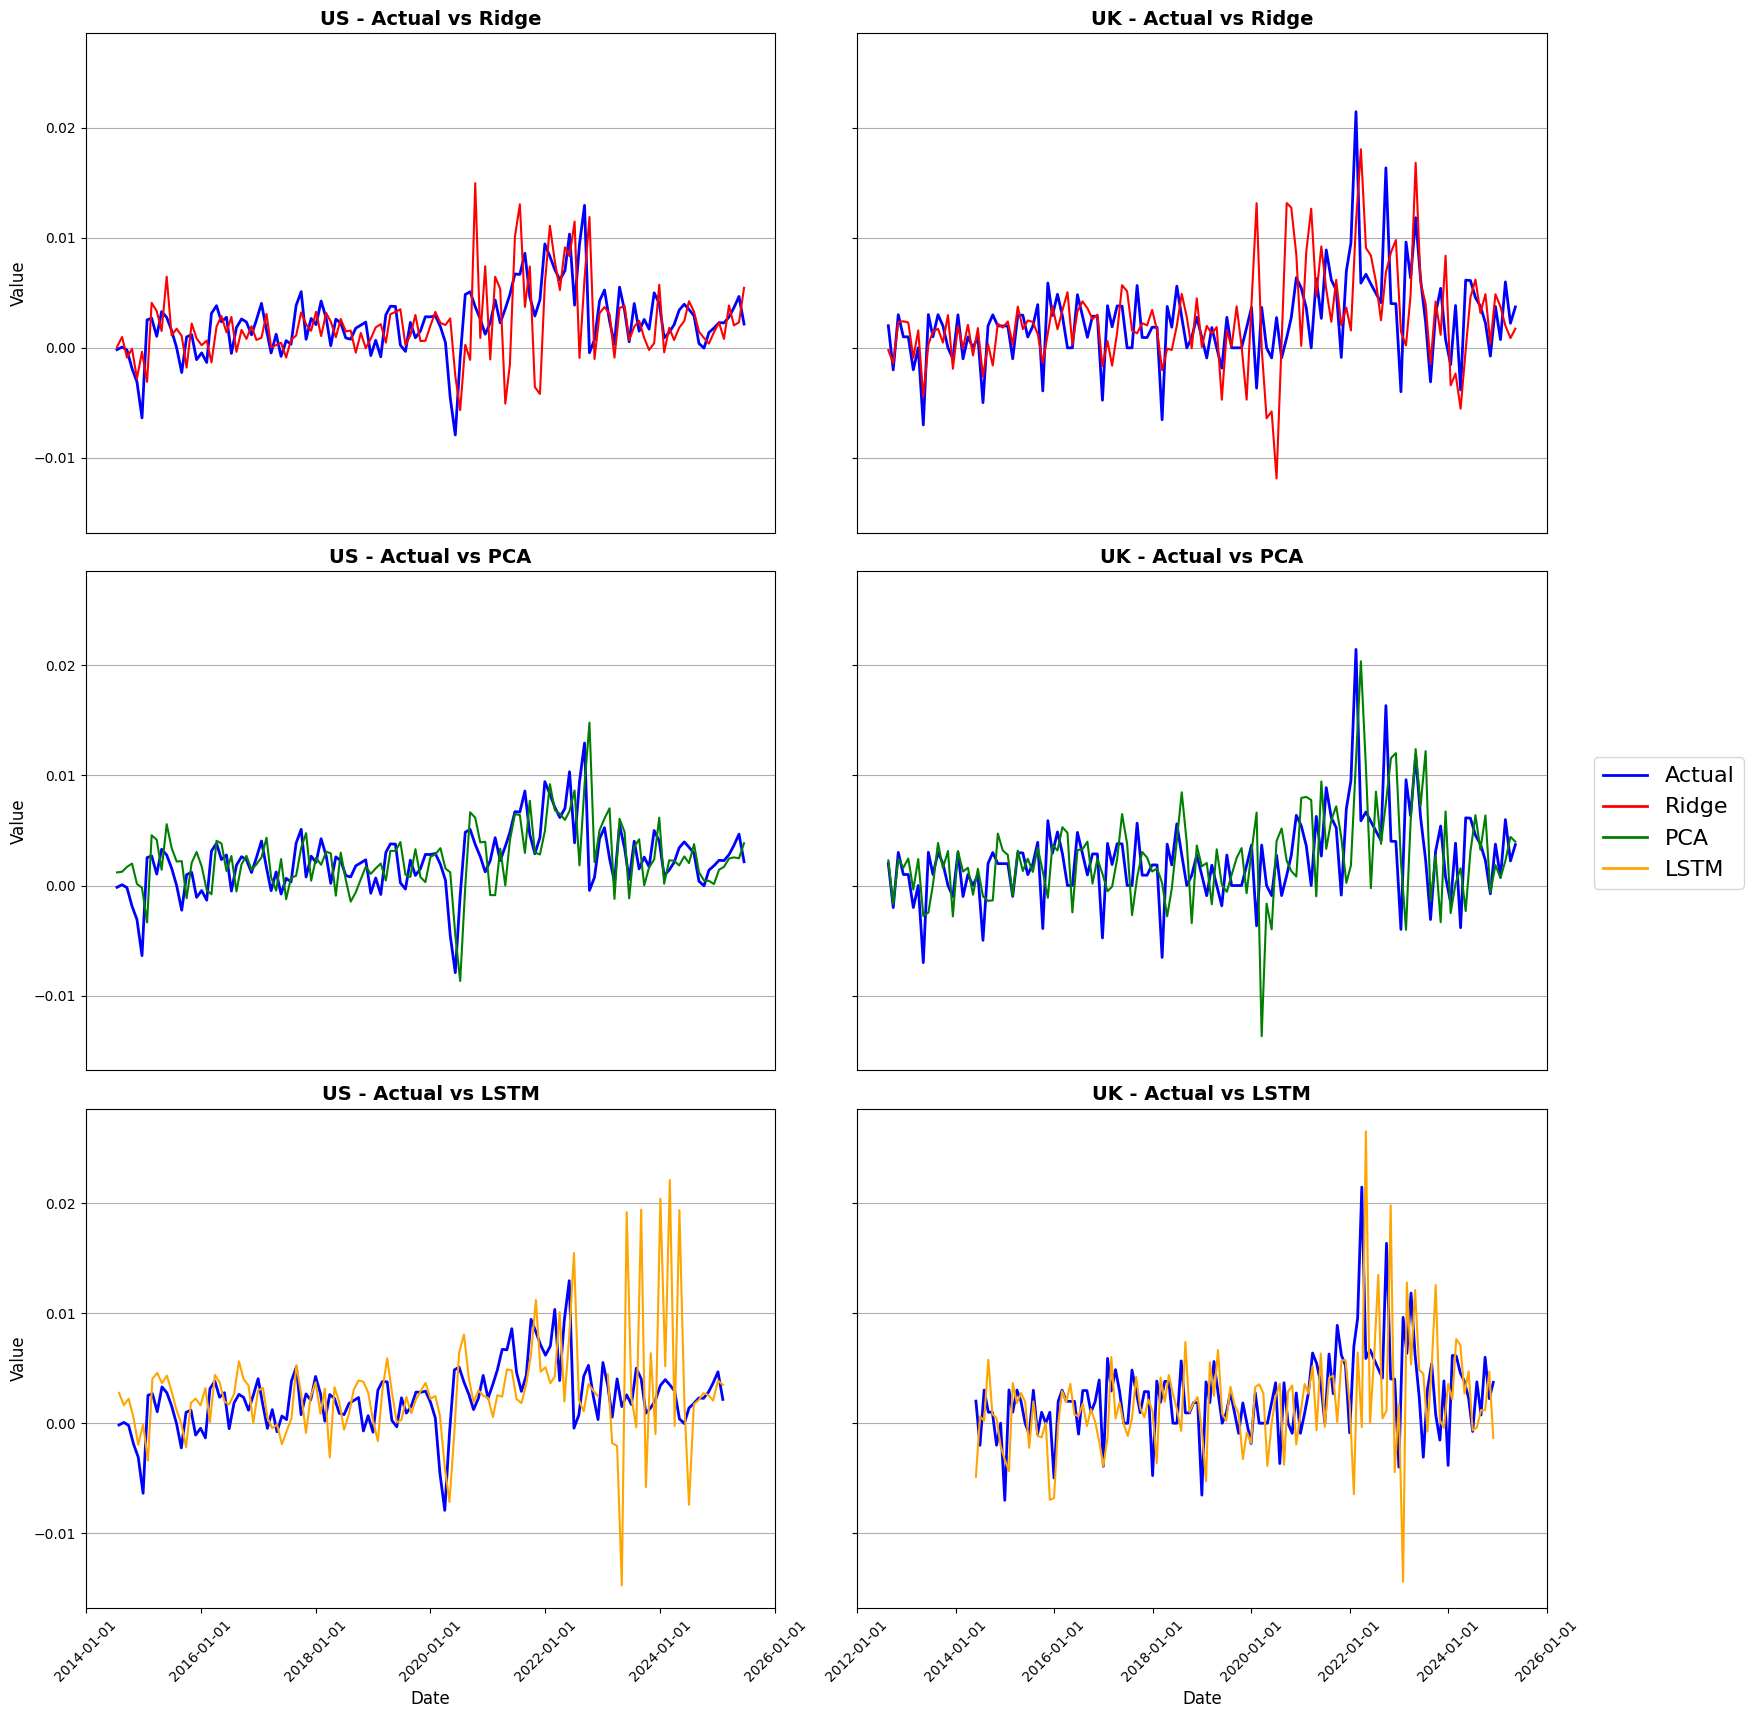

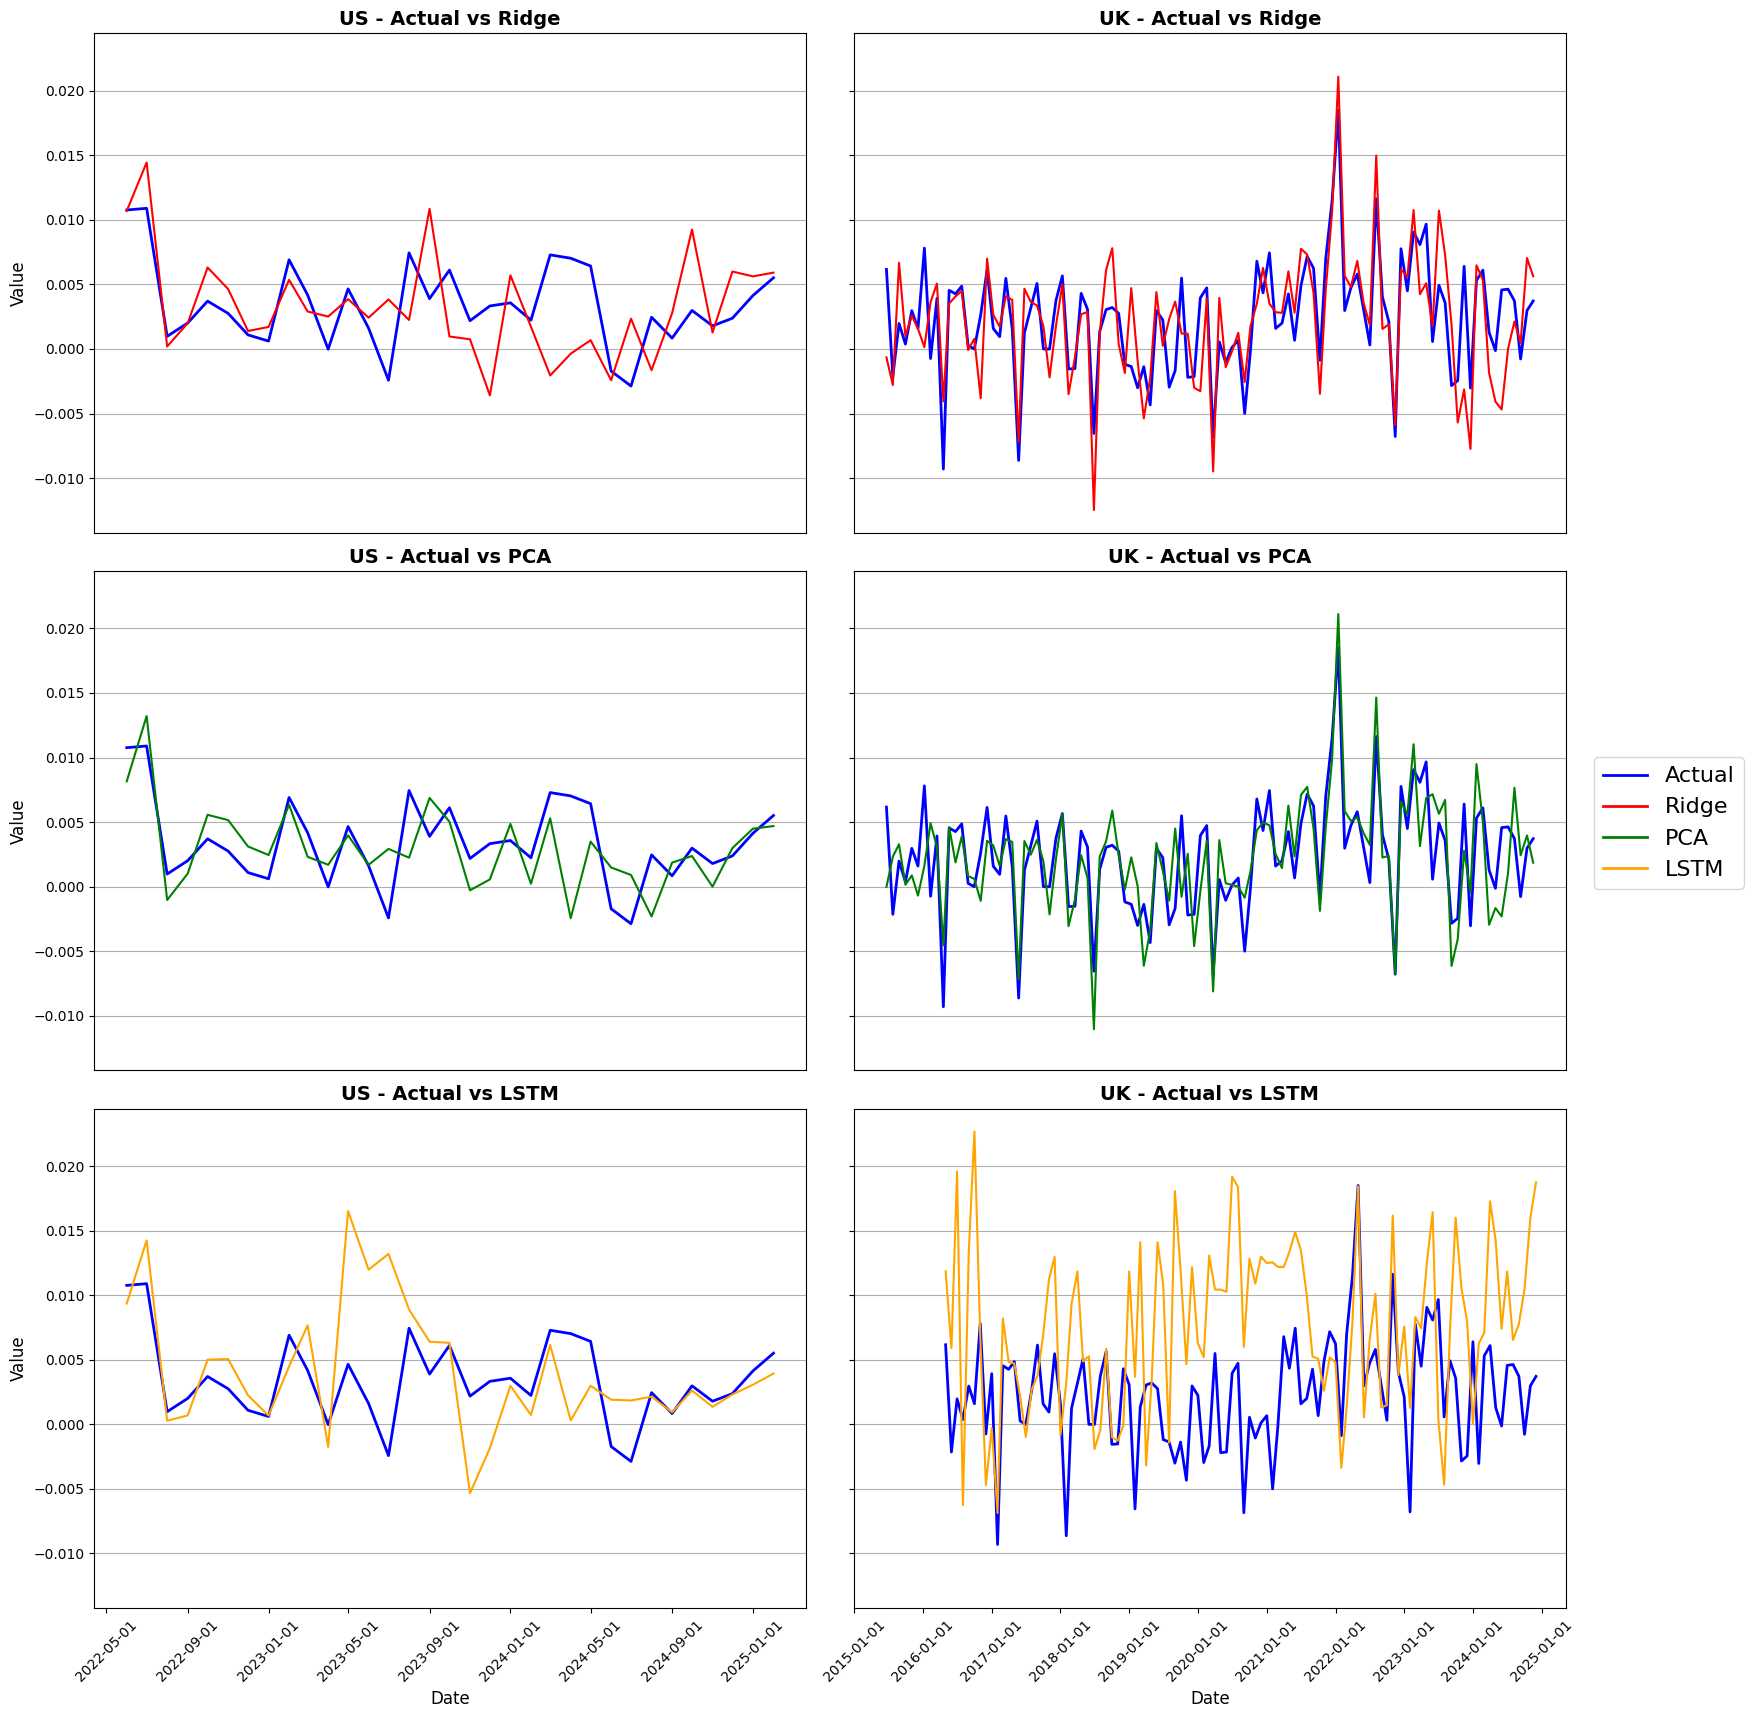

In [23]:
def plot_us_uk_comparison(us_results, uk_results):
    us_results = us_results[us_results['date']>='01-01-2014']
    uk_results = uk_results[uk_results['date']>='06-01-2014']
    # return(uk_results)
    # Create a 3x2 subplot grid (3 rows, 2 columns)
    fig, axs = plt.subplots(3, 2, figsize=(16, 18), sharey='all')

    # Plot US results in the first column
    axs[0, 0].plot(us_results["date"], us_results["actual"], label="Actual", color='blue', linewidth=2)
    axs[0, 0].plot(us_results["date"], us_results["ridge"], label="Ridge", color='red')
    axs[0, 0].set_ylabel("Value", fontsize=12)
    axs[0, 0].set_title("US - Actual vs Ridge", fontsize=14, fontweight = 'bold')
    axs[0, 0].grid(True)  # Add grid
    axs[0, 0].set_xticks([])  # Remove x-ticks
    # axs[0, 0].set_xlim(pd.Timestamp("2014-01-01"), pd.Timestamp("2025-06-01"))
    
    axs[1, 0].plot(us_results["date"], us_results["actual"], label="Actual", color='blue', linewidth=2)
    axs[1, 0].plot(us_results["date"], us_results["pca"], label="PCA", color='green')
    axs[1, 0].set_ylabel("Value", fontsize=12)
    axs[1, 0].set_title("US - Actual vs PCA", fontsize=14, fontweight = 'bold')
    axs[1, 0].grid(True)  # Add grid
    axs[1, 0].set_xticks([])  # Remove x-ticks
    # axs[1, 0].set_xlim(pd.Timestamp("2014-01-01"), pd.Timestamp("2025-06-01"))

    axs[2, 0].plot(us_results["date"], us_results["actual"], label="Actual", color='blue', linewidth=2)
    axs[2, 0].plot(us_results["date"], us_results["lstm"], label="LSTM", color='orange')
    axs[2, 0].set_xlabel("Date", fontsize=12)
    axs[2, 0].set_ylabel("Value", fontsize=12)
    axs[2, 0].set_title("US - Actual vs LSTM", fontsize=14, fontweight = 'bold')
    axs[2, 0].grid(True, axis='y')  # Add grid
    # axs[2, 0].set_xlim(pd.Timestamp("2014-01-01"), pd.Timestamp("2025-06-01"))

    # Plot UK results in the second column
    axs[0, 1].plot(uk_results["date"], uk_results["actual"], label="Actual", color='blue', linewidth=2)
    axs[0, 1].plot(uk_results["date"], uk_results["ridge"], label="Ridge", color='red')
    # axs[0, 1].set_ylabel("Value", fontsize=12)
    axs[0, 1].set_title("UK - Actual vs Ridge", fontsize=14, fontweight = 'bold')
    axs[0, 1].grid(True)  # Add grid
    axs[0, 1].set_xticks([])  # Remove x-ticks
    # axs[0, 1].set_xlim(pd.Timestamp("2014-01-01"), pd.Timestamp("2025-06-01"))

    axs[1, 1].plot(uk_results["date"], uk_results["actual"], label="Actual", color='blue', linewidth=2)
    axs[1, 1].plot(uk_results["date"], uk_results["pca"], label="PCA", color='green')
    # axs[1, 1].set_ylabel("Value", fontsize=12)
    axs[1, 1].set_title("UK - Actual vs PCA", fontsize=14, fontweight = 'bold')
    axs[1, 1].grid(True)  # Add grid
    axs[1, 1].set_xticks([])  # Remove x-ticks
    # axs[1, 1].set_xlim(pd.Timestamp("2014-01-01"), pd.Timestamp("2025-06-01"))
    
    axs[2, 1].plot(uk_results["date"], uk_results["actual"], label="Actual", color='blue', linewidth=2)
    axs[2, 1].plot(uk_results["date"], uk_results["lstm"], label="LSTM", color='orange')
    axs[2, 1].set_xlabel("Date", fontsize=12)
    # axs[2, 1].set_ylabel("Value", fontsize=12)
    axs[2, 1].set_title("UK - Actual vs LSTM", fontsize=14, fontweight = 'bold')
    axs[2, 1].grid(True, axis='y')  # Add grid
    # axs[2, 1].set_xlim(pd.Timestamp("2014-01-01"), pd.Timestamp("2025-06-01"))

    # Define a single custom legend for all subplots
    handles = [
        plt.Line2D([0], [0], color='blue', lw=2, label='Actual'),
        plt.Line2D([0], [0], color='red', lw=2, label='Ridge'),
        plt.Line2D([0], [0], color='green', lw=2, label='PCA'),
        plt.Line2D([0], [0], color='orange', lw=2, label='LSTM')
    ]
    labels = ['Actual', 'Ridge', 'PCA', 'LSTM']

    # Add a common legend with the custom handles
    fig.legend(handles, labels, loc='center right', ncol=1, bbox_to_anchor=(1.1, 0.5), fontsize=16)

    # Rotate x-axis labels for all subplots
    for ax in axs.flat:
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust title and layout

    # Show plot
    plt.show()

plot_us_uk_comparison(us_results_overall_monthly, uk_results_overall_monthly)
plot_us_uk_comparison(us_results_overall_quarterly, uk_results_overall_quarterly)